In [1]:

%load_ext autoreload
%autoreload 2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist
import matplotlib.gridspec as gridspec
from random import sample


import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\nlab\anaconda3\envs\ephys0\lib\site-packages\deeplabcut\__init__.py:78: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [2]:
def plot(df,key,color_pallete):
    key=key
    color_pallete = color_pallete
    color_map = create_color_dict(df,key,color_pallete)

   

    fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
    fig.suptitle('by ' + key + ' '+ 'and ' +'obstalce ')
    spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)


    """Right"""
    panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
    ax1 = fig.add_subplot(panel_1[0,0])
    plot_arena(df,ax1)
    ax2 = fig.add_subplot(panel_1[0,1])
    plot_arena(df,ax2)

    ax3 = fig.add_subplot(panel_1[0,2])
    plot_arena(df,ax3)
    ax4 = fig.add_subplot(panel_1[1,0])
    plot_arena(df,ax4)
    ax5 = fig.add_subplot(panel_1[1,1])
    plot_arena(df,ax5)
    ax6 = fig.add_subplot(panel_1[1,2])
    plot_arena(df,ax6)

    right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')


    """Left """
    panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
    ax7 = fig.add_subplot(panel_2[0,0])
    plot_arena(df,ax7)
    ax8 = fig.add_subplot(panel_2[0,1])
    plot_arena(df,ax8)
    ax8.set_title('left')
    ax9 = fig.add_subplot(panel_2[0,2])
    plot_arena(df,ax9)
    ax10 = fig.add_subplot(panel_2[1,0])
    plot_arena(df,ax10)
    ax11= fig.add_subplot(panel_2[1,1])
    plot_arena(df,ax11)
    ax12 = fig.add_subplot(panel_2[1,2])
    plot_arena(df,ax12)

    left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')



    """ plot trials"""
    right_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),right_axs))
    left_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),left_axs))

    for direction, direction_frame in df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            cluster_frame = cluster_frame.sample(50)
            right_obstacle_axis = right_obstacle_dict.get(cluster)
            left_obstalce_axis = left_obstacle_dict.get(cluster)
            plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
            plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
            right_obstacle_axis.set_title(str(cluster))
            left_obstalce_axis.set_title(str(cluster))
            for ind,row in cluster_frame.iterrows():
                color = color_map.get(pd.unique(row[key]).item())
                if direction == 'right':
                    which_axis = right_obstacle_dict.get(cluster)
                    which_axis.scatter(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
                if direction == 'left':
                    which_axis = left_obstacle_dict.get(cluster)
def interp_plot(df,key,color_pallete,num_sample):

    key=key
    color_pallete = color_pallete
    color_map = create_color_dict(df,key,color_pallete)

   

    fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
    fig.suptitle('by ' + key + ' '+ 'and ' +'obstalce ')
    spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)


    """Right"""
    panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
    ax1 = fig.add_subplot(panel_1[0,0])
    plot_arena(df,ax1)
    ax2 = fig.add_subplot(panel_1[0,1])
    plot_arena(df,ax2)

    ax3 = fig.add_subplot(panel_1[0,2])
    plot_arena(df,ax3)
    ax4 = fig.add_subplot(panel_1[1,0])
    plot_arena(df,ax4)
    ax5 = fig.add_subplot(panel_1[1,1])
    plot_arena(df,ax5)
    ax6 = fig.add_subplot(panel_1[1,2])
    plot_arena(df,ax6)

    right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')


    """Left """
    panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
    ax7 = fig.add_subplot(panel_2[0,0])
    plot_arena(df,ax7)
    ax8 = fig.add_subplot(panel_2[0,1])
    plot_arena(df,ax8)
    ax8.set_title('left')
    ax9 = fig.add_subplot(panel_2[0,2])
    plot_arena(df,ax9)
    ax10 = fig.add_subplot(panel_2[1,0])
    plot_arena(df,ax10)
    ax11= fig.add_subplot(panel_2[1,1])
    plot_arena(df,ax11)
    ax12 = fig.add_subplot(panel_2[1,2])
    plot_arena(df,ax12)

    left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')



    """ plot trials"""
    right_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),right_axs))
    left_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),left_axs))

    for direction, direction_frame in df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            cluster_frame = cluster_frame.sample(num_sample)
            right_obstacle_axis = right_obstacle_dict.get(cluster)
            left_obstacle_axis = left_obstacle_dict.get(cluster)
            plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
            plot_obstacle(cluster_frame,left_obstacle_axis,cluster)
            right_obstacle_axis.set_title(str(cluster))
            left_obstacle_axis.set_title(str(cluster))
            for ind,row in cluster_frame.iterrows():
                    color = color_map.get(pd.unique(str(row[key])).item())
                    if direction == 'right':
                        which_axis = right_obstacle_dict.get(cluster)
                        which_axis.plot(row['interp_ts_nose_x_cm'],row['interp_ts_nose_y_cm'],c = color,alpha = .5)

                    if direction == 'left':
                        which_axis = left_obstacle_dict.get(cluster)
                        which_axis.plot(row['interp_ts_nose_x_cm'],row['interp_ts_nose_y_cm'],c = color,alpha = .5)
            for start, start_frame in cluster_frame.groupby(['start']):
                
                if direction == 'right':
                    if start == 'top':
                        right_obstacle_axis.plot(start_frame['mean_interp_ts_nose_x_cm'].to_numpy()[0],start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                    if start == 'bottom':
                        right_obstacle_axis.plot(start_frame['mean_interp_ts_nose_x_cm'].to_numpy()[0],start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')

                
                if direction == 'left':
                    if start == 'top':
                        left_obstacle_axis.plot(start_frame['mean_interp_ts_nose_x_cm'].to_numpy()[0],start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                    if start == 'bottom':
                        left_obstacle_axis.plot(start_frame['mean_interp_ts_nose_x_cm'].to_numpy()[0],start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')

               

In [2]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\050323\G8CKRT\oa\processed_G8CKRT_050323_oa.h5")

In [3]:
session = plot_oa(r"D:\obstacle_avoidance\metadata\G8CK\G8CK_oa_042823_050323.json",'blank')
session.gather_session_df('obstacle',6)

6


In [4]:
session.df

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,mean_gt_obstacleTR_y_cm,mean_gt_obstacleBR_x_cm,mean_gt_obstacleBR_y_cm,mean_gt_obstacleBL_x_cm,mean_gt_obstacleBL_y_cm,interp_ts_nose_x_cm,interp_ts_nose_y_cm,start,mean_interp_ts_nose_x_cm,mean_interp_ts_nose_y_cm
0,1,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...",...,14.651349,37.275039,28.448987,32.296357,28.589656,"[47.57991702286641, 46.40804070112227, 44.5507...","[22.11995199212882, 22.252543680520972, 22.658...",bottom,"[48.83511684877562, 48.57885070406783, 48.1475...","[24.494542994333457, 24.6048723531612, 24.7847..."
1,3,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...",...,14.731362,30.110363,28.599506,24.966798,28.806503,"[49.12324392091654, 48.80135954969257, 48.1626...","[24.1267370906493, 24.75601866229086, 25.55811...",bottom,"[48.523718399309814, 48.25105688854951, 47.771...","[24.60045923488046, 24.70616638827171, 24.8189..."
2,5,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...",...,21.124599,37.101665,34.940904,31.986852,35.028746,"[48.589135174692714, 48.5113897534193, 48.3638...","[20.726043231174923, 20.627032772088857, 20.43...",top,"[47.23085389518286, 47.02362270959331, 46.6406...","[17.061126809811416, 17.074019096720626, 17.10..."
3,7,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...",...,21.124599,37.101665,34.940904,31.986852,35.028746,"[49.43852030968185, 49.33399554202782, 49.1111...","[25.275596782850933, 25.47849633090585, 25.829...",bottom,"[48.854616926116755, 48.58771892493375, 48.122...","[25.27121415192697, 25.36083638269888, 25.5059..."
4,8,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...",...,14.731362,30.110363,28.599506,24.966798,28.806503,"[10.743467536269417, 10.8739067033673, 11.1052...","[21.754542231262036, 21.73326920385291, 21.671...",top,"[12.796685881095609, 13.02858492826971, 13.445...","[18.129593080368032, 18.047704796064398, 17.88..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,158,56997.887680,56999.653209,"[56997.904038, 56997.920294, 56997.936742, 569...","[[36468, 36469, 36470, 36471, 36472, 36473, 36...","[684.3792724609375, nan, nan, nan, nan, nan, n...","[275.2332458496094, nan, nan, nan, nan, nan, n...","[671.2802734375, 671.4435424804

In [8]:
session.create_consective_df()

In [9]:
session.con_df

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,mean_gt_obstacleTR_y_cm,mean_gt_obstacleBR_x_cm,mean_gt_obstacleBR_y_cm,mean_gt_obstacleBL_x_cm,mean_gt_obstacleBL_y_cm,interp_ts_nose_x_cm,interp_ts_nose_y_cm,start,mean_interp_ts_nose_x_cm,mean_interp_ts_nose_y_cm
328,1,53950.560793,53955.750912,"[53950.571776, 53950.588467, 53950.605862, 539...","[[1284, 1285, 1286, 1287, 1288, 1289, 1290, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[671.5906982421875, 673.7359619140625, 676.169...","[266.6916198730469, 266.8547058105469, 267.870...","[671.5349731445312, 671.4368286132812, 673.386...",...,14.731362,30.110363,28.599506,24.966798,28.806503,"[46.9060199083342, 45.209313472328894, 41.7901...","[13.907156546906798, 14.413285456155247, 14.73...",top,"[47.27547984951218, 47.02724519082809, 46.5563...","[17.79150319441166, 17.766855058607817, 17.797..."
329,2,53955.750912,53958.114393,"[53955.75703, 53955.773632, 53955.791564, 5395...","[1595, 1596, 1597, 1598, 1599, 1600, 1601, 160...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[106.0430908203125, 105.33464813232422, 104.59...","[279.4571533203125, 279.2516784667969, 278.547...","[112.64200592041016, 112.10045623779297, 111.5...",...,14.731362,30.110363,28.599506,24.966798,28.806503,"[11.1505805185576, 11.352517423204475, 11.7411...","[28.344163552872367, 28.298651334567843, 28.21...",bottom,"[11.205340258897891, 11.513457336461517, 11.97...","[23.16661056822264, 23.25210136057502, 23.4268..."
330,3,53958.114393,53961.108915,"[53958.124454, 53958.142169, 53958.15776, 5395...","[[1737, 1738, 1739, 1740, 1741, 1742, 1743, 17...","[682.2976684570312, 683.12744140625, nan, nan,...","[274.8915100097656, 275.080078125, nan, nan, n...","[668.080078125, 670.3260498046875, 672.5081176...","[271.2999267578125, 271.7380676269531, 271.354...","[672.9752197265625, 674.0545654296875, 675.565...",...,14.731362,30.110363,28.599506,24.966798,28.806503,"[46.30583609040502, 45.96687612940522, 45.3011...","[18.63430261166269, 18.61945430588246, 18.5778...",top,"[47.27547984951218, 47.02724519082809, 46.5563...","[17.79150319441166, 17.766855058607817, 17.797..."
331,4,53961.108915,53964.852940,"[53961.125427, 53961.142144, 53961.15927, 5396...","[1917, 1918, 1919, 1920, 1921, 1922, 1923, 192...","[98.7120132446289, 98.35353088378906, 97.90589...","[277.3341064453125, 277.6127624511719, 277.443...","[117.34370422363281, 116.2473373413086, 115.83...","[267.73638916015625, 267.8100891113281, 267.67...","[107.49760437011719, 104.98799133300781, 104.5...",...,9.046516,37.195133,22.830101,32.190999,22.992026,"[11.332222995774199, 11.623841502498198, 12.13...","[22.096071658122778, 22.138856966230154, 22.20...",bottom,"[11.139687806737982, 11.36173778556124, 11.751...","[24.203938293317673, 24.30241725404778, 24.465..."
332,6,53978.456947,53981.152294,"[53978.464729, 53978.481766, 53978.498291, 539...","[2957, 2958, 2959, 2960, 2961, 2962, 2963, 296...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[107.61906433105469, 105.91256713867188, 105.2...","[275.3627624511719, 274.444091796875, 274.7034...","[108.35797882080078, 107.81783294677734, 107.7...",...,9.046516,37.195133,22.830101,32.190999,22.992026,"[10.93310959185713, 11.096693096913901, 11.377...","[25.573039282659735, 25.737073724136664, 26.09...",bottom,"[11.139687806737982, 11.36173778556124, 11.751...","[24.203938293317673, 24.30241725404778, 24.465..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,211,56176.791718,56178.938214,"[56176.805798, 56176.822694, 56176.839795, 561...","[35083, 35084, 35085, 35086, 35087, 35088, 350...","[112.92366027832031, 111.69530487060547, 114.1...","[277.7599182128906, 277.9961853027344, 279.012...","[133.8013153076172, 131

In [21]:
def split_range_into_parts(start, end, n):
    if start >= end:
        raise ValueError("Start value must be less than end value.")
    
    if n <= 0:
        raise ValueError("Number of parts (n) must be greater than 0.")
    
    total_range = end - start
    part_size = total_range / n
    
    ranges = []
    current_start = start
    
    for _ in range(n):
        current_end = current_start + part_size
        ranges.append((current_start, current_end))
        current_start = current_end
    
    return ranges

In [26]:
pd.unique(session.df.arenaTL_y_cm).item()

9.24541862155332

In [ ]:
labels = ['top','bottom']
top_bottom = split_range_into_parts(pd.unique(session.df.arenaTL_y_cm).item(),pd.unique(session.df.arenaBL_y_cm).item(),2)
top_bottom_dict = dict(zip(labels,top_bottom))
for ind, row in self.df.iterrows():
    if top_bottom_dict.get('top')[0]<= np.nanmean(row['interp_ts_nose_y_cm'][:5]) <= top_bottom_dict.get('top')[1]:
        self.df.at[ind,'start'] = 'top'
    if top_bottom_dict.get('bottom')[0]<= np.nanmean(row['interp_ts_nose_y_cm'][:5]) <= top_bottom_dict.get('bottom')[1]:
        self.df.at[ind,'start'] = 'bottom'

In [41]:
labels = ['top','bottom']
top_bottom = split_range_into_parts(pd.unique(session.df.arenaTL_y_cm).item(),pd.unique(session.df.arenaBL_y_cm).item(),2)
top_bottom_dict = dict(zip(labels,top_bottom))

In [44]:
top_bottom_dict.get('top')[1]

22.061791925741847

In [40]:
top_bottom

[(9.24541862155332, 22.061791925741847),
 (22.061791925741847, 34.878165229930374)]

In [39]:
top_bottom[0][1]

22.061791925741847

In [49]:
session.df.head()

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,mean_gt_obstacleTL_y_cm,mean_gt_obstacleTR_x_cm,mean_gt_obstacleTR_y_cm,mean_gt_obstacleBR_x_cm,mean_gt_obstacleBR_y_cm,mean_gt_obstacleBL_x_cm,mean_gt_obstacleBL_y_cm,interp_ts_nose_x_cm,interp_ts_nose_y_cm,start
0,1,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...",...,14.798251,37.037010,14.651349,37.275039,28.448987,32.296357,28.589656,"[47.57991702286641, 46.40804070112227, 44.5507...","[22.11995199212882, 22.252543680520972, 22.658...",bottom
1,3,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...",...,14.826814,29.843617,14.731362,30.110363,28.599506,24.966798,28.806503,"[49.12324392091654, 48.80135954969257, 48.1626...","[24.1267370906493, 24.75601866229086, 25.55811...",bottom
2,5,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...",...,21.290619,37.078518,21.124599,37.101665,34.940904,31.986852,35.028746,"[48.589135174692714, 48.5113897534193, 48.3638...","[20.726043231174923, 20.627032772088857, 20.43...",top
3,7,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...",...,21.290619,37.078518,21.124599,37.101665,34.940904,31.986852,35.028746,"[49.43852030968185, 49.33399554202782, 49.1111...","[25.275596782850933, 25.47849633090585, 25.829...",bottom
4,8,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...",...,14.826814,29.843617,14.731362,30.110363,28.599506,24.966798,28.806503,"[10.743467536269417, 10.8739067033673, 11.1052...","[21.754542231262036, 21.73326920385291, 21.671...",top


In [74]:
x = session.df.loc[(session.df['start']=='top') & (session.df['obstacle_cluster']==0),'interp_ts_nose_x_cm'].mean
np.concatenate( x )

KeyError: 0

In [81]:
x.mean(skipna=True)

array([        nan,         nan, 28.80112792, 28.88988767, 28.9698201 ,
       29.03717074, 29.09296024, 29.13993642, 29.16852363,         nan,
               nan,         nan, 29.20034004,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 32.35535066,
       32.48432317, 32.61320397, 32.75166459, 32.88599711,         nan,
               nan,         nan,         nan,         nan,         nan])

In [94]:
np.zeros([323, 50])[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
session.df.loc[(session.df['start']=='top') & (session.df['obstacle_cluster']==0)&(session.df['odd']=='left'),'interp_ts_nose_x_cm']

6       [12.118725733490773, 13.25510212897545, 15.124...
39      [11.488280198314255, 11.84888944358683, 12.647...
52      [10.762733879423527, 11.526136459502018, 12.68...
58      [11.446286267772606, 11.63666517086317, 11.987...
61      [11.917121745694093, 12.482946628277785, 13.43...
                              ...                        
4516    [13.252684550695383, 13.607870254367722, 14.39...
4522    [14.131728856790067, 14.357712190686433, 14.78...
4531    [13.649412718123372, 13.978419728687015, 14.67...
4543    [13.446538257808868, 13.650418993652258, 14.03...
4563    [14.300446470265161, 14.518731995520616, 14.92...
Name: interp_ts_nose_x_cm, Length: 323, dtype: object

In [97]:
direction_frame

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,mean_gt_obstacleTL_y_cm,mean_gt_obstacleTR_x_cm,mean_gt_obstacleTR_y_cm,mean_gt_obstacleBR_x_cm,mean_gt_obstacleBR_y_cm,mean_gt_obstacleBL_x_cm,mean_gt_obstacleBL_y_cm,interp_ts_nose_x_cm,interp_ts_nose_y_cm,start
4,8,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...",...,14.826814,29.843617,14.731362,30.110363,28.599506,24.966798,28.806503,"[10.743467536269417, 10.8739067033673, 11.1052...","[21.754542231262036, 21.73326920385291, 21.671...",top
6,12,55917.832371,55923.653376,"[55917.839628, 55917.856435, 55917.8731, 55917...","[4688, 4689, 4690, 4691, 4692, 4693, 4694, 469...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[105.07991027832031, 105.05810546875, 105.1277...","[281.0788269042969, 280.4348449707031, 280.006...","[112.86511993408203, 113.046142578125, 113.153...",...,9.362914,29.295145,9.052090,29.818294,22.905476,24.793502,23.178787,"[12.118725733490773, 13.25510212897545, 15.124...","[20.16748894663524, 18.991916015797464, 17.331...",top
8,14,55927.954496,55931.387212,"[55927.960486, 55927.976742, 55927.993382, 559...","[5295, 5296, 5297, 5298, 5299, 5300, 5301, 530...","[98.15608215332031, 97.80842590332031, 97.5306...","[278.38739013671875, 278.87322998046875, 278.9...","[117.51110076904297, 116.8153076171875, 116.47...","[265.369873046875, 265.8777770996094, 266.7402...","[105.63497161865234, 104.48536682128906, 104.4...",...,14.798251,37.037010,14.651349,37.275039,28.448987,32.296357,28.589656,"[10.224557310057685, 10.588289934116245, 11.40...","[25.925086795450497, 26.319869626872503, 26.93...",bottom
10,16,55935.069849,55938.699174,"[55935.079347, 55935.095859, 55935.112512, 559...","[5722, 5723, 5724, 5725, 5726, 5727, 5728, 572...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[106.55535888671875, 105.57233428955078, 106.2...","[278.3585510253906, 278.1001892089844, 278.066...","[111.23238372802734, 109.92574310302734, 111.6...",...,14.826814,29.843617,14.731362,30.110363,28.599506,24.966798,28.806503,"[11.054087912142343, 11.399585783697013, 11.93...","[24.919561593444236, 25.109429525012068, 25.38...",bottom
12,18,55943.532812,55946.461939,"[55943.548748, 55943.566284, 55943.582028, 559...","[6230, 6231, 6232, 6233, 6234, 6235, 6236, 623...","[97.86846160888672, 97.88721466064453, 97.7272...","[277.66925048828125, 278.1065979003906, 277.46...","[117.37734985351562, 117.06179809570312, 117.5...","[264.6326904296875, 265.6798400878906, 265.429...","[106.09050750732422, 105.71224212646484, 106.2...",...,14.826814,29.843617,14.731362,30.110363,28.599506,24.966798,28.806503,"[10.08628664209906, 10.180485282890883, 10.391...","[24.0144540116135, 24.347150310370147, 24.9871...",bottom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568,153,56973.707187,56975.411020,"[56973.711462, 56973.729484, 56973.745024, 569...","[35017, 35018, 35019, 35020, 35021, 35022, 350...","[114.54601287841797, 113.3774185180664, 112.86...","[280.76910400390625, 280.79742431640625, 280.3...","[127.03024291992188, 125.83805847167969, 125.1...","[276.9449768066406, 276.7208251953125, 275.785...","[122.95169067382812, 121.351318359375, 120.849...",...,21.290619,37.078518,21.124599,37.101665,34.940904,31.986852,35.028746,"[11.257474440603822, 11.45737988638882, 11.817...","[23.82382260987189, 23.857908334113382, 23.901...",bottom
4570,157,56994.631001,56997.887680,"[56994.63552, 56994.653222, 56994.669376, 5699...","[36272, 36273, 36274,

In [105]:
mean_trace[0,:].astype(object)

array([11.065918455777778, 11.324414571823482, 11.760551109138989,
       12.280398549609965, 12.840191793766548, 13.427771704039358,
       14.046563507149632, 14.695916290859065, 15.378259782044255,
       16.069582128345964, 16.76507656953665, 17.47304623307329,
       18.20228557179953, 18.95840684989022, 19.763653763455963,
       20.585554388043906, 21.38950118257586, 22.196918453250643,
       23.008548104298963, 23.827066744798852, 24.668996347630532,
       25.52852970309599, 26.396191777104978, 27.27492924630648,
       28.166966471889303, 29.070300919801962, 29.97891750797469,
       30.903873202697856, 31.85158270713629, 32.81563746111437,
       33.80952431132123, 34.843779716670404, 35.92660955853701,
       37.048919770396346, 38.207709623252825, 39.441907482065204,
       40.7020173899547, 42.01364057414045, 43.35143831031664,
       44.70347713072974, 46.184934517463105, 47.40382058681907,
       48.69344377967186, 49.87616960475731, 50.93013211122899,
       51.829225

In [126]:
session.df = session.df.drop(columns=['mean_interp_ts_nose_x_cm'])

In [123]:
session.df.loc[(session.df['obstacle_cluster'] ==cluster) & (session.df['start']==start)&(session.df['odd'] ==direction),['mean_interp_ts_nose_x_cm']]

,mean_interp_ts_nose_x_cm
15,NaN
17,NaN
28,NaN
54,NaN
67,NaN
...,...
4297,NaN
4432,NaN
4434,NaN
4472,NaN


In [297]:
#session.df['mean_interp_ts_nose_x_cm'] = np.nan
#session.df['mean_interp_ts_nose_y_cm'] = np.nan
for direction, direction_frame in session.df.groupby(['odd']):
    for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
        
        for start, start_frame in cluster_frame.groupby(['start']):
            count = 0
            array = np.zeros([len(start_frame), 2, 50])
            for ind, row in start_frame.iterrows():
                array[count,0,:] = row['interp_ts_nose_x_cm']
                array[count,1,:] = row['interp_ts_nose_y_cm']
                count += 1
            mean_trace = np.nanmean(array,axis=0)
            x = session.df.loc[(session.df['obstacle_cluster'] ==cluster) & (session.df['start']==start)&(session.df['odd'] ==direction)]
            #session.df.loc[(session.df['obstacle_cluster'] ==cluster) & (session.df['start']==start)&(session.df['odd'] ==direction),['mean_interp_ts_nose_y_cm']] = mean_trace[1,:].astype(object)
            for ind,row in x.iterrows():
                session.df.at[ind,'mean_interp_ts_nose_x_cm']= mean_trace[0,:].astype(object)
                session.df.at[ind,'mean_interp_ts_nose_y_cm']= mean_trace[1,:].astype(object)
            

            

In [214]:
test = session.df.sample(10)

for ind,row in enumerate(test.iterrows()):
    print(ind)

0
1
2
3
4
5
6
7
8
9


In [307]:
cluster_0 = session.df.loc[(session.df.obstacle_cluster == 0) & (session.df.odd == 'right') & (session.df.start == 'top')]

In [295]:
cluster_0['mean_interp_ts_nose_x_cm'][16]

array([48.02012587236274, 47.7511983045828, 47.26993991590014,
       46.6600947466823, 45.97846116326975, 45.26524366030942,
       44.539970484959966, 43.818244592998646, 43.09334313434825,
       42.392697274433125, 41.71617347521506, 41.05344167216866,
       40.40178115240085, 39.77555440597749, 39.17744286971063,
       38.607146614103, 38.062005951894875, 37.52813056411213,
       36.996155951661464, 36.4618221745858, 35.92207707831827,
       35.37042097256322, 34.79344173259053, 34.19408296184827,
       33.561829594846465, 32.89183220184058, 32.17622918976093,
       31.4084737024091, 30.589905791125688, 29.71923212944434,
       28.800211918488827, 27.80093691996613, 26.717702157095516,
       25.56670435041865, 24.348170406643703, 23.072627300806214,
       21.747523490868186, 20.38167606836651, 18.978003397927928,
       17.554442312473075, 16.14514330931544, 14.772988217648258,
       13.466240210799427, 12.258352949424868, 11.230862717451945,
       10.366260185641256, 9

In [ ]:
array = np.zeros([len(start_frame), 2, 50])
            for ind, row in start_frame.iterrows():
                array[count,0,:] = row['interp_ts_nose_x_cm']
                array[count,1,:] = row['interp_ts_nose_y_cm']
                count += 1
            mean_trace = np.nanmean(array,axis=0)
            x = session.df.loc[(session.df['obstacle_cluster'] ==cluster) & (session.df['start']==start)&(session.df['odd'] ==direction)]
            #session.df.loc[(session.df['obstacle_cluster'] ==cluster) & (session.df['start']==start)&(session.df['odd'] ==direction),['mean_interp_ts_nose_y_cm']] = mean_trace[1,:].astype(object)
            for ind,row in x.iterrows():
                session.df.at[ind,'mean_interp_ts_nose_x_cm']= mean_trace[0,:].astype(object)
                session.df.at[ind,'mean_interp_ts_nose_y_cm']= mean_trace[1,:].astype(object)

In [272]:
np.zeros([len(test_array), 50])


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [246]:
test_array = test['interp_ts_nose_x_cm'].to_numpy()
np.zeros([len(test_array), 50]).shape

(464, 50)

In [309]:
cluster_0.mean_interp_ts_nose_y_cm

16      [17.082255657246467, 17.04049488724327, 16.956...
27      [17.082255657246467, 17.04049488724327, 16.956...
38      [17.082255657246467, 17.04049488724327, 16.956...
40      [17.082255657246467, 17.04049488724327, 16.956...
53      [17.082255657246467, 17.04049488724327, 16.956...
                              ...                        
4503    [17.082255657246467, 17.04049488724327, 16.956...
4515    [17.082255657246467, 17.04049488724327, 16.956...
4523    [17.082255657246467, 17.04049488724327, 16.956...
4544    [17.082255657246467, 17.04049488724327, 16.956...
4551    [17.082255657246467, 17.04049488724327, 16.956...
Name: mean_interp_ts_nose_y_cm, Length: 262, dtype: object

In [320]:
cluster_0.obstacle_cluster.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [317]:
column_to_array('obstacle_cluster',cluster_0)

49.2903954308633


TypeError: object of type 'numpy.float64' has no len()

In [285]:
nose_x,nose_y = column_to_array('interp_ts_nose_x_cm',cluster_0),column_to_array('interp_ts_nose_y_cm',cluster_0)

In [316]:
def column_to_array(column,df):
    to_array = df[str(column)].to_numpy()
    #print(test_array[0])
    array= np.zeros([len(df),  len(to_array[0])])
    count = 0
    for row in to_array:
        array[count,:] = row
        count += 1
    return array
        


In [263]:
test_array = test['interp_ts_nose_x_cm'].to_numpy()

array = np.zeros([len(test_array), 1, 50])
count = 0 
for  row in test_array:
    array[count,:] = row.itemset()
    count += 1
    





ValueError: itemset must have at least one argument

In [283]:
nose_x.shape

(464, 1, 50)

(0.0, 72.0)

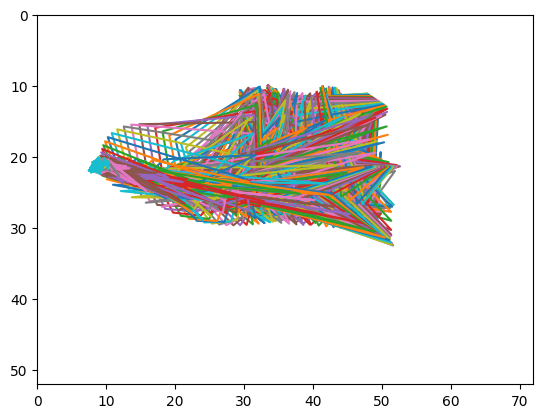

In [288]:
plt.plot(nose_x[:50],nose_y[:50])
plt.ylim([52,0]); plt.xlim([0, 72])

In [165]:
 session.df.arenaTL_x

0       [77.35858917236328, 77.27197265625, 77.3769607...
1       [77.44384002685547, 77.1745376586914, 77.06443...
2       [77.68761444091797, 77.81293487548828, 77.6061...
3       [78.05250549316406, 78.05545043945312, 78.0123...
4       [77.89686584472656, 76.95319366455078, 77.0669...
                              ...                        
4571    [91.74250030517578, 91.36055755615234, 91.6452...
4572    [91.29051208496094, 91.38648223876953, 91.3441...
4573    [91.7339096069336, 91.57929992675781, 91.36703...
4574    [91.32331085205078, 91.50167083740234, 91.6919...
4575    [91.18989562988281, 91.08425903320312, 91.2041...
Name: arenaTL_x, Length: 4576, dtype: object

In [103]:
session.df.loc[(session.df['obstacle_cluster'] ==cluster) & (session.df['start']==start)&(session.df['odd'] ==direction),['mean_interp_ts_nose_x_cm']] 

,mean_interp_ts_nose_x_cm
15,NaN
17,NaN
28,NaN
54,NaN
67,NaN
...,...
4297,NaN
4432,NaN
4434,NaN
4472,NaN


In [186]:
test['interp_ts_nose_x_cm'].item()

array([14.033251757554634, 14.229882861662311, 14.599161489084711,
       15.103597905940441, 15.702318155640116, 16.357951885183816,
       17.039030581188932, 17.719926471074533, 18.376957078546052,
       18.998621158729083, 19.579006601847155, 20.11736769031524,
       20.617093233055925, 21.085501238304758, 21.53488914681757,
       21.986466949790927, 22.46707011773805, 23.001282516368196,
       23.606640505368762, 24.289803411874935, 25.048229460914843,
       25.87593583331451, 26.775975277157844, 27.74042302529811,
       28.7693003933723, 29.86145127644886, 31.014811499499558,
       32.22699076602858, 33.49466121300043, 34.816448451243275,
       36.17585278993915, 37.559535938378694, 38.9528929271502,
       40.34186006054526, 41.71434007509382, 43.06084480013271,
       44.36952712839696, 45.6366994684511, 46.85470847039461,
       48.01459677349153, 49.10596334739584, 50.116577943808814,
       51.03211976594741, 51.82352623354006, 52.489905333575074,
       53.026512677

In [199]:
def plot_single_trial(df,ax,cluster):
    plot_arena(df,ax)
    plot_obstacle(df,ax,cluster)
    ax.plot(test['interp_ts_nose_x_cm'].item(),test['interp_ts_nose_y_cm'].item())

In [213]:
test.columns

Index(['index', 'first_poke', 'second_poke', 'trial_timestamps',
       'trial_vidframes', 'nose_x', 'nose_y', 'leftear_x', 'leftear_y',
       'rightear_x',
       ...
       'mean_gt_obstacleTR_y_cm', 'mean_gt_obstacleBR_x_cm',
       'mean_gt_obstacleBR_y_cm', 'mean_gt_obstacleBL_x_cm',
       'mean_gt_obstacleBL_y_cm', 'interp_ts_nose_x_cm', 'interp_ts_nose_y_cm',
       'start', 'mean_interp_ts_nose_x_cm', 'mean_interp_ts_nose_y_cm'],
      dtype='object', length=162)

In [519]:
def get_angle_to_ports(df):

    for ind,row in df.iterrows():
        angle_to_rightport = []
        angle_to_leftport = []
        rightport = [row['rightportT_x_cm'],row['rightportT_y_cm']]
        leftport = [row['leftportT_x_cm'],row['leftportT_y_cm']]
        for indx in range(len(row['ts_nose_x_cm'])):
            center = [np.mean([row['ts_rightear_x_cm'][indx],row['ts_leftear_x_cm'][indx]]),np.mean([row['ts_rightear_y_cm'][indx],row['ts_leftear_y_cm'][indx]])]
            nose_points = [row['ts_nose_x_cm'][indx],row['ts_nose_y_cm'][indx]]
            angleright = calculate_angle(center, nose_points, rightport)
            angleleft = calculate_angle(center, nose_points, leftport)
            angle_to_rightport.append(angleright)
            angle_to_leftport.append(angleleft)
        df.at[ind,'angle_to_rightport'] = np.array(angle_to_rightport).astype(object)
        df.at[ind,'angle_to_leftport'] = np.array(angle_to_leftport).astype(object)
    right_left = ['angle_to_leftport','angle_to_rightport','ts_nose_x_cm','ts_nose_y_cm']
    for ind,row in df.iterrows():
        for direction in right_left:
            interp = pd.Series(row[direction].astype(float)).interpolate().values
            resample = signal.resample(interp,200)
            df.at[ind,'resample_'+ direction] = resample.astype(object)

In [514]:
keys = list_columns(test,['obstacle'])
keys = [key for key in keys if 'gt' in key if 'mean' not in key and 'cen' not in key and 'cm' in key] 
corner_list = []
for corner in keys:
    corner = corner.split('_',2)[1]
    corner_list.append(corner)
np.unique(corner_list).tolist()

['obstacleBL', 'obstacleBR', 'obstacleTL', 'obstacleTR']

In [511]:
corner_list

['obstacleTL',
 'obstacleTL',
 'obstacleTR',
 'obstacleTR',
 'obstacleBR',
 'obstacleBR',
 'obstacleBL',
 'obstacleBL']

In [433]:
def angle_to_edges(df):
    keys = list_columns(df,['obstacle'])
    keys = [key for key in keys if 'gt' in key if 'mean' not in key and 'cen' not in key and 'cm' in key] 
    corner_list = []
    for corner in keys:
        corner = corner.split('_',2)[1]
        corner_list.append(corner)
    np.unique(corner_list).tolist()
    for ind,row in df.iterrows():
        for corner in corner_list:
            angle_to = []
            position = [row['gt_' + corner + '_x_cm'],row['gt_' + corner + '_y_cm']]
            for indx in range(len(row['ts_nose_x_cm'])):
                center = [np.mean([row['ts_rightear_x_cm'][indx],row['ts_leftear_x_cm'][indx]]),np.mean([row['ts_rightear_y_cm'][indx],row['ts_leftear_y_cm'][indx]])]
                nose_points = [row['ts_nose_x_cm'][indx],row['ts_nose_y_cm'][indx]]
                angle = calculate_angle(center, nose_points, position)
                angle_to.append(angle)

            df.at[ind,'angle_to_' + corner] = np.array(angle_to).astype(object)
               


    


In [6]:
session.df

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,mean_gt_obstacleTR_y_cm,mean_gt_obstacleBR_x_cm,mean_gt_obstacleBR_y_cm,mean_gt_obstacleBL_x_cm,mean_gt_obstacleBL_y_cm,interp_ts_nose_x_cm,interp_ts_nose_y_cm,start,mean_interp_ts_nose_x_cm,mean_interp_ts_nose_y_cm
0,1,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...",...,14.651349,37.275039,28.448987,32.296357,28.589656,"[47.57991702286641, 46.40804070112227, 44.5507...","[22.11995199212882, 22.252543680520972, 22.658...",bottom,"[48.83511684877562, 48.57885070406783, 48.1475...","[24.494542994333457, 24.6048723531612, 24.7847..."
1,3,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...",...,14.731362,30.110363,28.599506,24.966798,28.806503,"[49.12324392091654, 48.80135954969257, 48.1626...","[24.1267370906493, 24.75601866229086, 25.55811...",bottom,"[48.523718399309814, 48.25105688854951, 47.771...","[24.60045923488046, 24.70616638827171, 24.8189..."
2,5,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...",...,21.124599,37.101665,34.940904,31.986852,35.028746,"[48.589135174692714, 48.5113897534193, 48.3638...","[20.726043231174923, 20.627032772088857, 20.43...",top,"[47.23085389518286, 47.02362270959331, 46.6406...","[17.061126809811416, 17.074019096720626, 17.10..."
3,7,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...",...,21.124599,37.101665,34.940904,31.986852,35.028746,"[49.43852030968185, 49.33399554202782, 49.1111...","[25.275596782850933, 25.47849633090585, 25.829...",bottom,"[48.854616926116755, 48.58771892493375, 48.122...","[25.27121415192697, 25.36083638269888, 25.5059..."
4,8,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...",...,14.731362,30.110363,28.599506,24.966798,28.806503,"[10.743467536269417, 10.8739067033673, 11.1052...","[21.754542231262036, 21.73326920385291, 21.671...",top,"[12.796685881095609, 13.02858492826971, 13.445...","[18.129593080368032, 18.047704796064398, 17.88..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,158,56997.887680,56999.653209,"[56997.904038, 56997.920294, 56997.936742, 569...","[[36468, 36469, 36470, 36471, 36472, 36473, 36...","[684.3792724609375, nan, nan, nan, nan, nan, n...","[275.2332458496094, nan, nan, nan, nan, nan, n...","[671.2802734375, 671.4435424804

In [7]:
session.df.to_hdf(r'D:\obstacle_avoidance\recordings\data_h5\G8CK_051023.h5','w' )

In [520]:
angle_to_edges(test)
get_angle_to_ports(test)

In [632]:
test.time

1482    2.966667
Name: time, dtype: float64

In [639]:
len(test.trial_vidframes.item())

179

In [641]:
179/60

2.9833333333333334

In [643]:
test.dist

1482    44.374257
Name: dist, dtype: float64

In [378]:
keys

['gt_obstacleTL_x_cm',
 'gt_obstacleTL_y_cm',
 'gt_obstacleTR_x_cm',
 'gt_obstacleTR_y_cm',
 'gt_obstacleBR_x_cm',
 'gt_obstacleBR_y_cm',
 'gt_obstacleBL_x_cm',
 'gt_obstacleBL_y_cm']

In [377]:
corner_list

['obstacleTL',
 'obstacleTL',
 'obstacleTR',
 'obstacleTR',
 'obstacleBR',
 'obstacleBR',
 'obstacleBL',
 'obstacleBL']

In [425]:
keys = list_columns(test,['obstacle'])
keys= [key for key in keys if 'gt' in key if 'mean' not in key and 'cen' not in key and 'cm' in key]
corner_list = []
for corner in keys:
    corner = corner.split('_',2)[1]
   
    corner_list.append(corner)


In [432]:
np.unique(corner_list).tolist()

['obstacleBL', 'obstacleBR', 'obstacleTL', 'obstacleTR']

In [364]:
corner = [corner for corner in keys ]

NameError: name 'key' is not defined

In [329]:
get_angle_to_ports(test)

(0.0, 180.0)

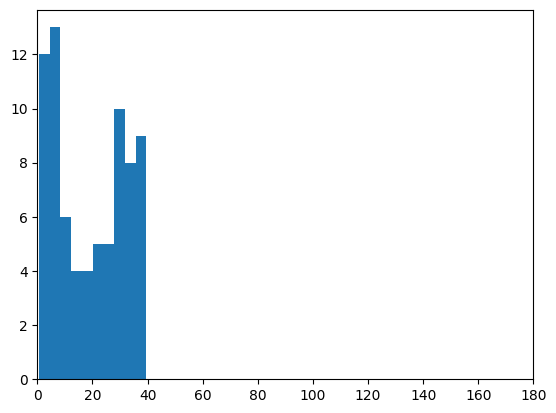

In [339]:
plt.hist(test.angle_to_leftport)
plt.xlim(0,180)

In [335]:
test.angle_to_leftport.item()

array([35.0063668217492, 34.211231662646775, 32.84682666433832,
       31.287671169232812, 29.941168809164637, 29.14404595653372,
       29.101609085794315, 29.86670050743055, 31.34280896506243,
       33.302725126115064, 35.425728659582326, 37.358249687351865,
       38.78920182673101, 39.51569830318801, 39.475876799428015,
       38.741836356673495, 37.48239825670528, 35.91336077330766,
       34.245062607914875, 32.63291016165779, 31.1335710914599,
       29.676045266244618, 28.056321118425082, 25.96966366227195,
       23.07767033514671, 19.099060221157934, 13.90540846086389,
       7.603498083587725, 0.5782947419113122, 6.5507812287441185,
       13.086921207407018, 18.46567775396401, 22.39483607631929,
       24.856914157424686, 26.013414322390688, 26.089897478319998,
       25.299812046411343, 23.821543242211018, 21.808182821716077,
       19.400210205234973, 16.723044274916724, 13.874337342893234,
       10.91754095257191, 7.893436052480931, 4.850570713254815,
       1.88173276

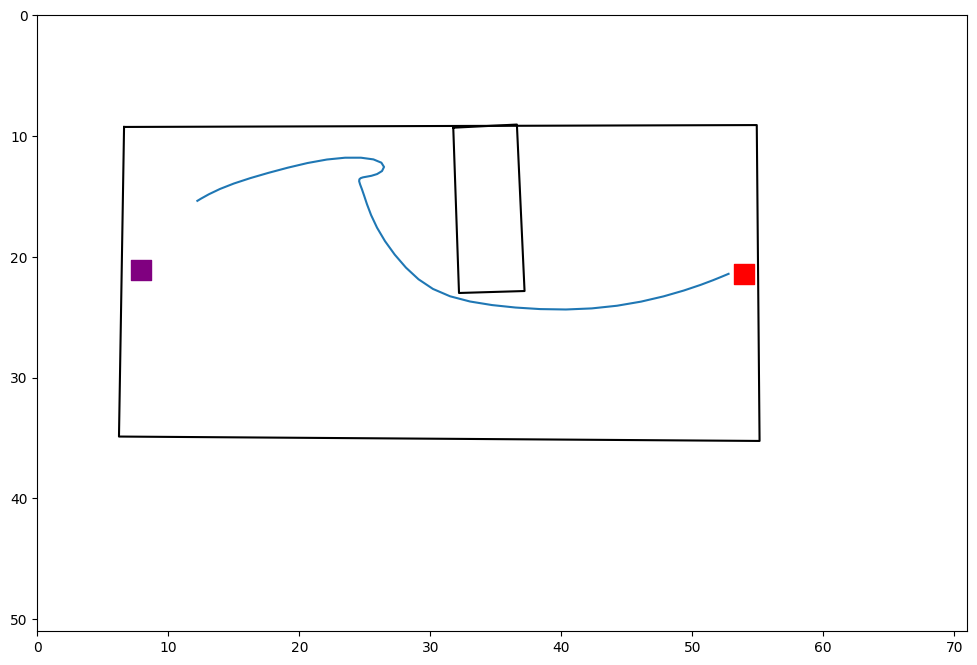

In [631]:
test = session.df.sample(1)
angle_to_edges(test)
get_angle_to_ports(test)
fig, ax = plt.subplots(figsize=(12, 8))
plot_single_trial(test,ax,test['obstacle_cluster'])



In [549]:
test.odd

2589    right
Name: odd, dtype: object

In [466]:
len(test.angle_to_obstacleTR.to_list()[0])

76

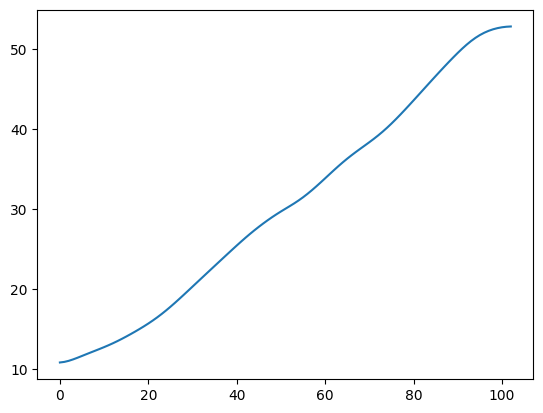

In [609]:
plt.plot(range(len(test.ts_nose_x_cm.to_list()[0])),test.ts_nose_x_cm.to_list()[0])

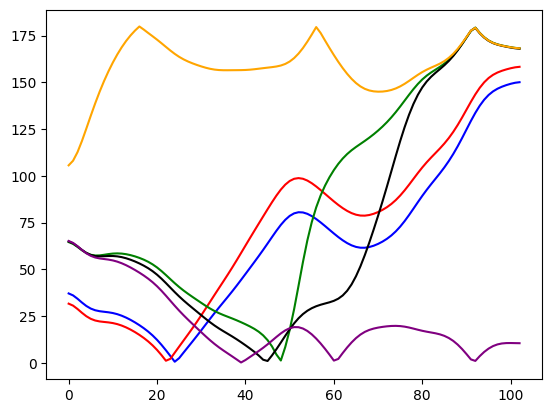

In [610]:
plt.plot(range(len(test.angle_to_obstacleBR.to_list()[0])),test.angle_to_obstacleBR.to_list()[0],'b')
plt.plot(range(len(test.angle_to_obstacleBL.to_list()[0])),test.angle_to_obstacleBL.to_list()[0],'red')


plt.plot(range(len(test.angle_to_obstacleTL.to_list()[0])),test.angle_to_obstacleTL.to_list()[0],'green')
plt.plot(range(len(test.angle_to_obstacleTR.to_list()[0])),test.angle_to_obstacleTR.to_list()[0],'black')

plt.plot(range(len(test.angle_to_rightport.to_list()[0])),test.angle_to_rightport.to_list()[0],'purple')
plt.plot(range(len(test.angle_to_leftport.to_list()[0])),test.angle_to_leftport.to_list()[0],'orange')





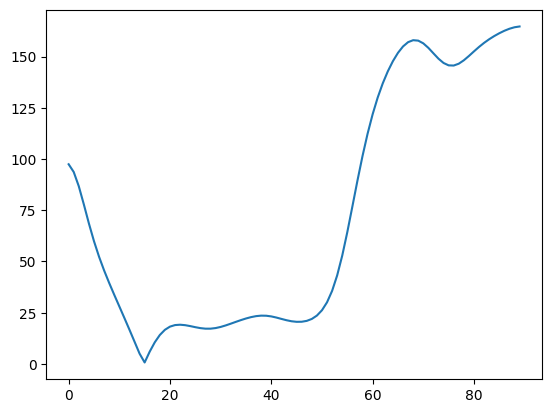

In [507]:
plt.plot(range(len(test.angle_to_obstacleTR.to_list()[0])),test.angle_to_obstacleTR.to_list()[0])

In [455]:
test.angle_to_obstacleTR.to_numpy()

array([array([35.28559683262484, 34.55356877031871, 33.31747873569431,
              31.956121067300252, 30.883334335914146, 30.444100843794395,
              30.852808301756383, 32.17053190938388, 34.30637237256565,
              37.03534802293993, 40.03667708419493, 42.95709255868485,
              45.48854590069794, 47.43396956226806, 48.737151555114316,
              49.471297625133815, 49.79866044968622, 49.920270614385196,
              50.024422134910466, 50.236983391942765, 50.574327175380304,
              50.9092758687716, 50.96283008077794, 50.33980373126654,
              48.60696263217301, 45.39886962071116, 40.525862379046224,
              34.060486951783425, 26.374972486751176, 18.085368946608387,
              9.87977726454802, 2.2939337391285535, 4.442794218534468,
              10.426173070128685, 16.004148481948235, 21.697553634022505,
              28.177824558046098, 36.30242681376894, 47.08642936653829,
              61.251367101917786, 78.0284954187046, 94.61259

In [209]:
test = session.df.sample(1)

In [566]:
split_range_into_parts(pd.unique(session.df.arenaTL_y_cm).item(),pd.unique(session.df.arenaBL_y_cm).item(),3)

[(9.24541862155332, 17.789667491012338),
 (17.789667491012338, 26.333916360471356),
 (26.333916360471356, 34.878165229930374)]

In [571]:
top_bottom_dict.values()

dict_values([(9.24541862155332, 22.061791925741847), (22.061791925741847, 34.878165229930374)])

In [ ]:
 session.df.drop()

In [579]:
labels = ['top','bottom']
top_bottom = split_range_into_parts(pd.unique(session.df.arenaTL_y_cm).item(),pd.unique(session.df.arenaBL_y_cm).item(),2)
top_bottom_dict = dict(zip(labels,top_bottom))
for ind, row in session.df.iterrows():
    if top_bottom_dict.get('top')[0]<= np.nanmean(row['interp_ts_nose_y_cm'][:5]) <= top_bottom_dict.get('top')[1]:
        session.df.at[ind,'start'] = 'top'
    if top_bottom_dict.get('bottom')[0]<= np.nanmean(row['interp_ts_nose_y_cm'][:5]) <= top_bottom_dict.get('bottom')[1]:
        session.df.at[ind,'start'] = 'bottom'
  

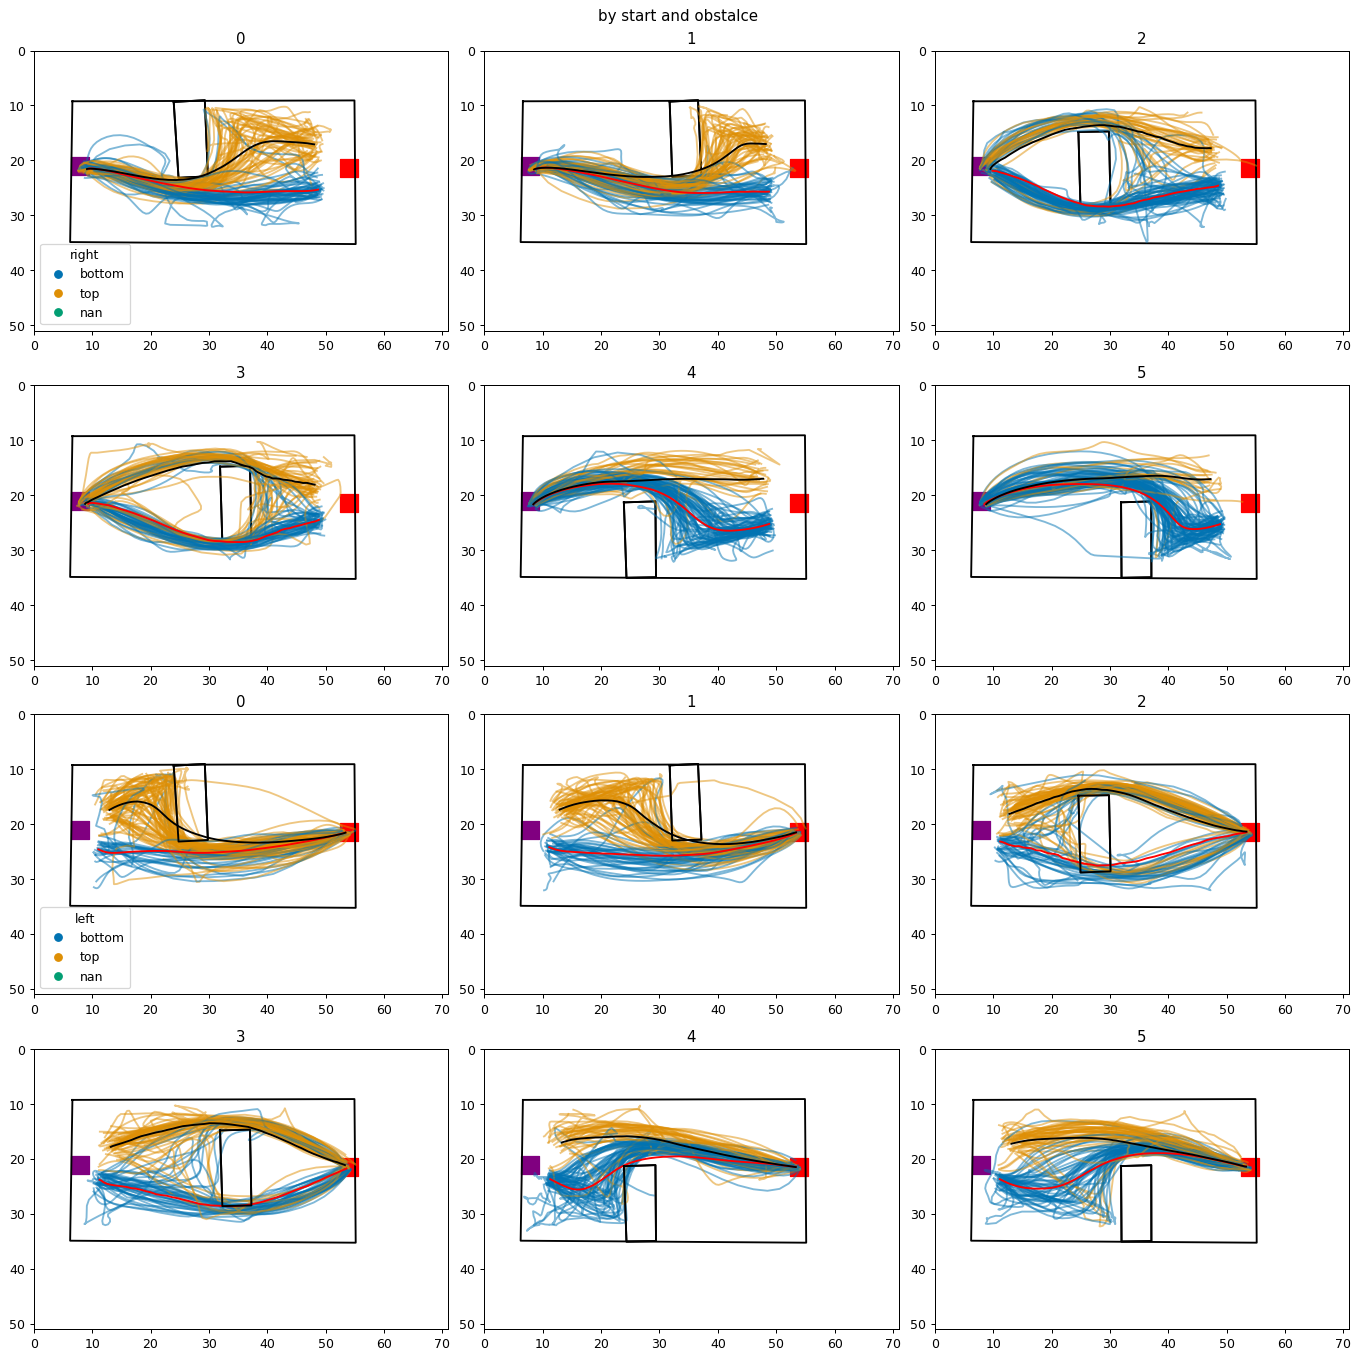

In [5]:
interp_plot(session.df,'start','colorblind',100)

In [ ]:
self.df.loc[(self.df['obstacle_cluster'] ==cluster) & (self.df['start']==start)&(self.df['odd'] ==direction)]

In [51]:
obstacle_x = pd.unique(session.df[['mean_gt_obstacleTL_x_cm',
        'mean_gt_obstacleTR_x_cm','mean_gt_obstacleBR_x_cm',
        'mean_gt_obstacleBL_x_cm',
        'mean_gt_obstacleTL_x_cm']].values.ravel('K'))

In [52]:
obstacle_x

array([31.90685593, 24.6017002 , 31.90848994, 23.96779858, 31.75287807,
       23.9108475 , 37.03701034, 29.84361662, 37.07851806, 29.29514472,
       36.61030048, 29.31684435, 37.27503921, 30.11036289, 37.10166496,
       29.81829383, 37.19513262, 29.41267259, 32.29635665, 24.96679801,
       31.98685207, 24.79350201, 32.19099909, 24.35607502])

In [5]:
session.df

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,mean_gt_obstacleTL_x_cm,mean_gt_obstacleTL_y_cm,mean_gt_obstacleTR_x_cm,mean_gt_obstacleTR_y_cm,mean_gt_obstacleBR_x_cm,mean_gt_obstacleBR_y_cm,mean_gt_obstacleBL_x_cm,mean_gt_obstacleBL_y_cm,interp_ts_nose_x_cm,interp_ts_nose_y_cm
0,1,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...",...,31.906856,14.798251,37.037010,14.651349,37.275039,28.448987,32.296357,28.589656,"[47.57991702286641, 46.40804070112227, 44.5507...","[22.11995199212882, 22.252543680520972, 22.658..."
1,3,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...",...,24.601700,14.826814,29.843617,14.731362,30.110363,28.599506,24.966798,28.806503,"[49.12324392091654, 48.80135954969257, 48.1626...","[24.1267370906493, 24.75601866229086, 25.55811..."
2,5,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...",...,31.908490,21.290619,37.078518,21.124599,37.101665,34.940904,31.986852,35.028746,"[48.589135174692714, 48.5113897534193, 48.3638...","[20.726043231174923, 20.627032772088857, 20.43..."
3,7,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...",...,31.908490,21.290619,37.078518,21.124599,37.101665,34.940904,31.986852,35.028746,"[49.43852030968185, 49.33399554202782, 49.1111...","[25.275596782850933, 25.47849633090585, 25.829..."
4,8,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...",...,24.601700,14.826814,29.843617,14.731362,30.110363,28.599506,24.966798,28.806503,"[10.743467536269417, 10.8739067033673, 11.1052...","[21.754542231262036, 21.73326920385291, 21.671..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,158,56997.887680,56999.653209,"[56997.904038, 56997.920294, 56997.936742, 569...","[[36468, 36469, 36470, 36471, 36472, 36473, 36...","[684.3792724609375, nan, nan, nan, nan, nan, n...","[275.2332458496094, nan, nan, nan, nan, nan, n...","[671.2802734375, 671.4435424804688, 672.833190...","[270.5364074707031, 268.6509094238281, 268.146...","[676.2732543945312, 677.2616577148438, 677.459...",...,31.906856,14.798251,37.037010,14.651349,37.275039,28.448987,32.296357,28.589656,"[48.39325454316035, 48.220581979125676, 47.896...","[18.959706521696898, 19.058754797529325, 19.21..."
4572,161,57007.452492,57009.173004,"[57007.457113, 57007.473484, 57007.

In [11]:
test = session.df.sample(5)

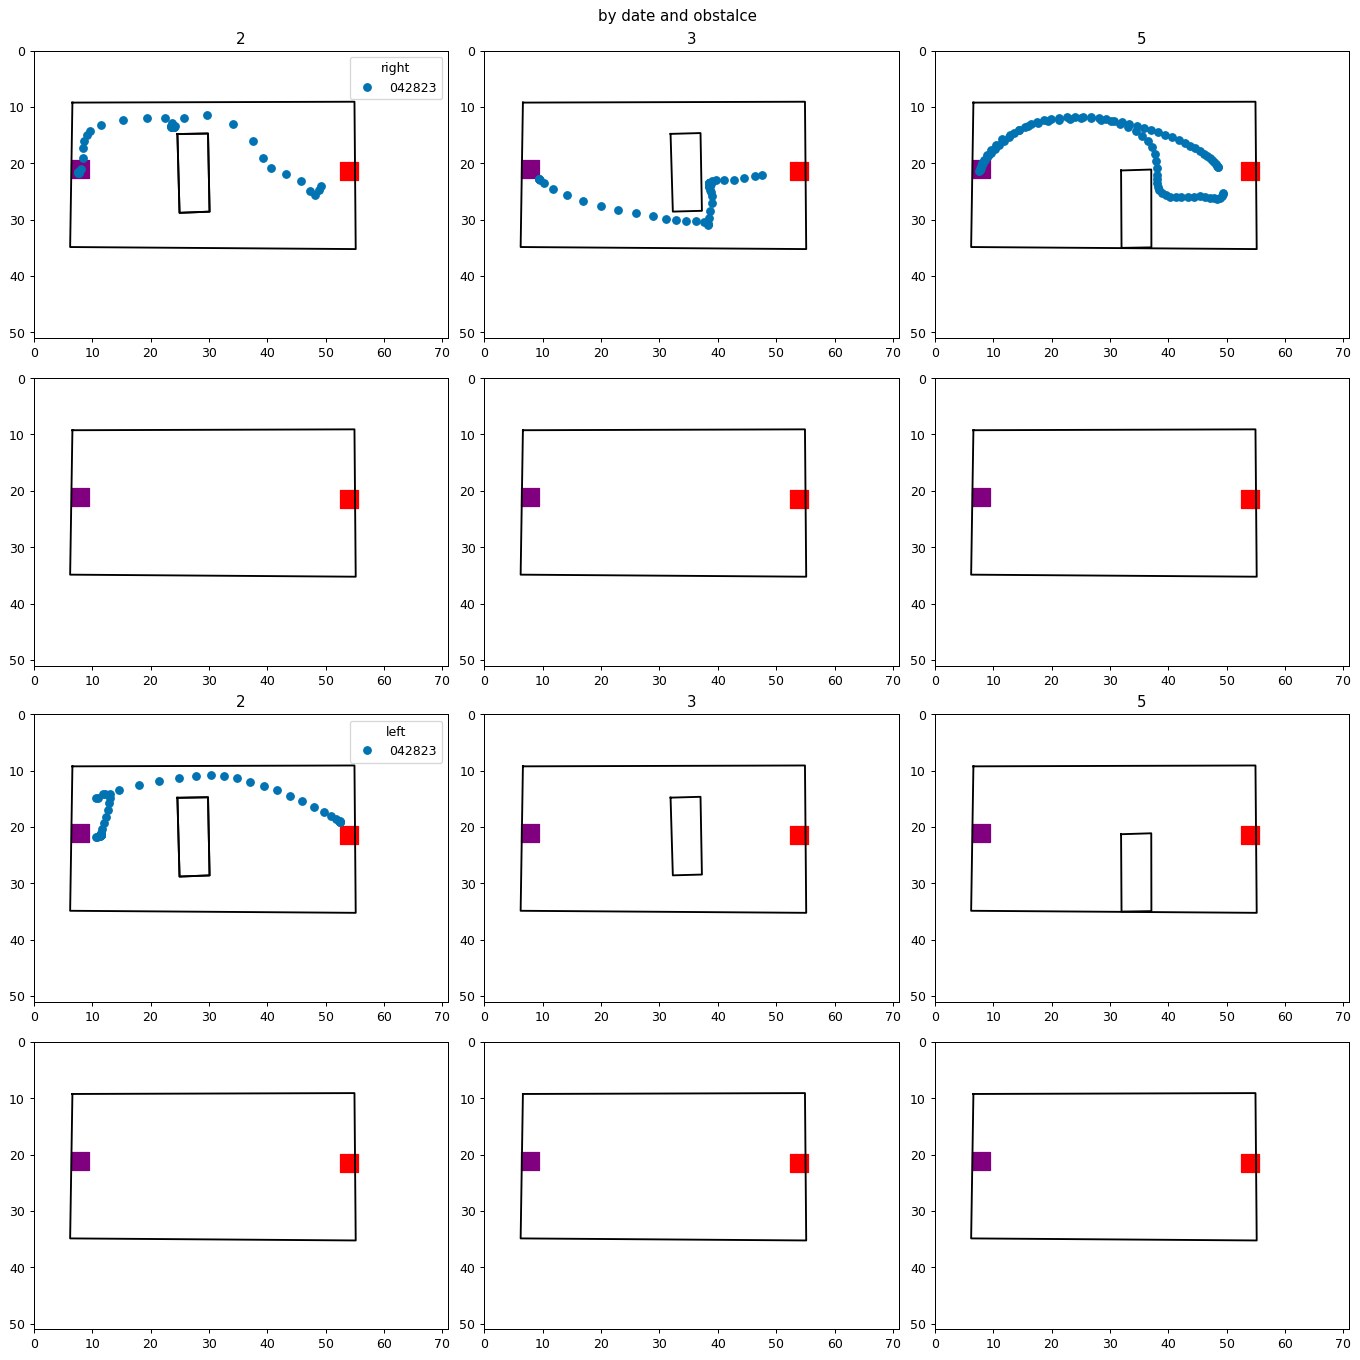

In [52]:
interp_plot(session.df.head(),'date','colorblind')

In [29]:
def plot(df,key,color_pallete):
    key=key
    color_pallete = color_pallete
    color_map = create_color_dict(df,key,color_pallete)

   

    fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
    fig.suptitle('by ' + key + ' '+ 'and ' +'obstalce ')
    spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)


    """Right"""
    panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
    ax1 = fig.add_subplot(panel_1[0,0])
    plot_arena(df,ax1)
    ax2 = fig.add_subplot(panel_1[0,1])
    plot_arena(df,ax2)

    ax3 = fig.add_subplot(panel_1[0,2])
    plot_arena(df,ax3)
    ax4 = fig.add_subplot(panel_1[1,0])
    plot_arena(df,ax4)
    ax5 = fig.add_subplot(panel_1[1,1])
    plot_arena(df,ax5)
    ax6 = fig.add_subplot(panel_1[1,2])
    plot_arena(df,ax6)

    right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')


    """Left """
    panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
    ax7 = fig.add_subplot(panel_2[0,0])
    plot_arena(df,ax7)
    ax8 = fig.add_subplot(panel_2[0,1])
    plot_arena(df,ax8)
    ax8.set_title('left')
    ax9 = fig.add_subplot(panel_2[0,2])
    plot_arena(df,ax9)
    ax10 = fig.add_subplot(panel_2[1,0])
    plot_arena(df,ax10)
    ax11= fig.add_subplot(panel_2[1,1])
    plot_arena(df,ax11)
    ax12 = fig.add_subplot(panel_2[1,2])
    plot_arena(df,ax12)

    left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')



    """ plot trials"""
    right_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),right_axs))
    left_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),left_axs))

    for direction, direction_frame in df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            cluster_frame = cluster_frame.sample(50)
            right_obstacle_axis = right_obstacle_dict.get(cluster)
            left_obstalce_axis = left_obstacle_dict.get(cluster)
            plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
            plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
            right_obstacle_axis.set_title(str(cluster))
            left_obstalce_axis.set_title(str(cluster))
            for ind,row in cluster_frame.iterrows():
                color = color_map.get(pd.unique(row[key]).item())
                if direction == 'right':
                    which_axis = right_obstacle_dict.get(cluster)
                    which_axis.scatter(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
                if direction == 'left':
                    which_axis = left_obstacle_dict.get(cluster)
def interp_plot(df,key,color_pallete):
    key=key
    color_pallete = color_pallete
    color_map = create_color_dict(df,key,color_pallete)

   

    fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
    fig.suptitle('by ' + key + ' '+ 'and ' +'obstalce ')
    spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)


    """Right"""
    panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
    ax1 = fig.add_subplot(panel_1[0,0])
    plot_arena(df,ax1)
    ax2 = fig.add_subplot(panel_1[0,1])
    plot_arena(df,ax2)

    ax3 = fig.add_subplot(panel_1[0,2])
    plot_arena(df,ax3)
    ax4 = fig.add_subplot(panel_1[1,0])
    plot_arena(df,ax4)
    ax5 = fig.add_subplot(panel_1[1,1])
    plot_arena(df,ax5)
    ax6 = fig.add_subplot(panel_1[1,2])
    plot_arena(df,ax6)

    right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')


    """Left """
    panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
    ax7 = fig.add_subplot(panel_2[0,0])
    plot_arena(df,ax7)
    ax8 = fig.add_subplot(panel_2[0,1])
    plot_arena(df,ax8)
    ax8.set_title('left')
    ax9 = fig.add_subplot(panel_2[0,2])
    plot_arena(df,ax9)
    ax10 = fig.add_subplot(panel_2[1,0])
    plot_arena(df,ax10)
    ax11= fig.add_subplot(panel_2[1,1])
    plot_arena(df,ax11)
    ax12 = fig.add_subplot(panel_2[1,2])
    plot_arena(df,ax12)

    left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')



    """ plot trials"""
    right_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),right_axs))
    left_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),left_axs))

    for direction, direction_frame in df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            #cluster_frame = cluster_frame.sample(50)
            right_obstacle_axis = right_obstacle_dict.get(cluster)
            left_obstalce_axis = left_obstacle_dict.get(cluster)
            plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
            plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
            right_obstacle_axis.set_title(str(cluster))
            left_obstalce_axis.set_title(str(cluster))
            for ind,row in cluster_frame.iterrows():
                color = color_map.get(pd.unique(row[key]).item())
                if direction == 'right':
                    which_axis = right_obstacle_dict.get(cluster)
                    which_axis.scatter(row['interp_ts_nose_x_cm'],row['interp_ts_nose_y_cm'],c = color)
                if direction == 'left':
                    which_axis = left_obstacle_dict.get(cluster)
                    which_axis.scatter(row['interp_ts_nose_x_cm'],row['interp_ts_nose_y_cm'],c = color)

In [55]:
fake_time = np.linspace(0,1,50)
box_sz = 5 
box = np.ones(box_sz)/box_sz

count = 0
for ind, row in session.df.iterrows():
    xT = np.linspace(0,1,len(row['ts_nose_x_cm'])); yT = np.linspace(0,1,len(row['ts_nose_y_cm']))
    intx = interp1d(xT, row['ts_nose_x_cm'], bounds_error=False,fill_value= 'extrapolate')(fake_time).astype(object)
    inty = interp1d(yT, row['ts_nose_y_cm'], bounds_error=False,fill_value= 'extrapolate')(fake_time).astype(object)
    
    
    session.df.at[ind,'interp_ts_nose_x_cm'] = intx.astype(object)
    session.df.at[ind,'interp_ts_nose_y_cm'] = inty.astype(object)
    

(array([ 503., 1821., 1149.,  531.,  277.,  131.,   78.,   55.,   25.,
           6.]),
 array([ 64. , 107.7, 151.4, 195.1, 238.8, 282.5, 326.2, 369.9, 413.6,
        457.3, 501. ]),
 <BarContainer object of 10 artists>)

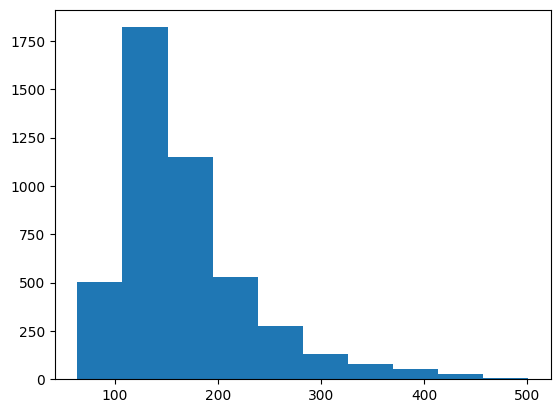

In [10]:
plt.hist(session.df.len)

In [5]:
session.plot_consective_trials('animal','colorblind')

In [54]:
session.obstacle_by_variable('date','rocket')

In [ ]:
def create_consective_df(self):
    con_df = pd.DataFrame()
    df = self.df.reset_index(drop=True)
    for animal,animal_frame in df.groupby('animal'):
        for date, date_frame in animal_frame.groupby('date'):
            repeats_list = find_consecutive_repeats(date_frame['obstacle_cluster'])
            for i in range(len(repeats_list)):
                con_df = con_df.append(date_frame.loc[repeats_list[i][0]:repeats_list[i][1]])
    self.con_df = con_df

In [152]:
def plot_arena(df,axis):
    arena_x = pd.unique(df[['arenaTL_x_cm',
    'arenaTR_x_cm','arenaBR_x_cm',
    'arenaBL_x_cm',
    'arenaTL_x_cm']].values.ravel('K'))

    arena_y = pd.unique(df[['arenaTL_y_cm',
    'arenaTR_y_cm','arenaBR_y_cm',
    'arenaBL_y_cm',
    'arenaTL_y_cm']].values.ravel('K'))

    obstacle_x = pd.unique(df[['gt_obstacleTL_x_cm',
    'gt_obstacleTR_x_cm','gt_obstacleBR_x_cm',
    'gt_obstacleBL_x_cm',
    'gt_obstacleTL_x_cm']].values.ravel('K'))

    obstacle_y =  pd.unique(df[['gt_obstacleTL_y_cm',
    'gt_obstacleTR_y_cm','gt_obstacleBR_y_cm',
    'gt_obstacleBL_y_cm',
    'gt_obstacleTL_y_cm']].values.ravel('K'))

    left_port =  pd.unique(df[['leftportT_x_cm','leftportT_y_cm']].values.ravel('K'))

    right_port = pd.unique(df[['rightportT_x_cm','rightportT_y_cm']].values.ravel('K'))

    axis.plot([obstacle_x[0],obstacle_x[1],obstacle_x[2],obstacle_x[3],obstacle_x[0]],
                          [obstacle_y[0],obstacle_y[1],obstacle_y[2],obstacle_y[3],obstacle_y[0]],c='k')
    
    axis.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
                          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

    axis.scatter(left_port[0],left_port[1],c='purple',s=200,marker = 's')
    axis.scatter(right_port[0],right_port[1],c='r',s=200,marker = 's')

    
    axis.set_ylim([51,0]); axis.set_xlim([0, 71])
    


In [153]:
"""create color dict for unique items in list"""
def create_color_dict(df,key,color_pallete):
    color_labels = color_labels = df[key].unique()
    rgb_values = sns.color_palette(color_pallete, len(color_labels))
    color_map = dict(zip(color_labels, rgb_values))
    return color_map

In [207]:
"""consecutive plots"""

savepath = "D:/obstacle_avoidance/recordings"
savepath_session = os.path.join(*[savepath,'figures'])
key = 'animal'
color_pallete = 'colorblind'
color_map = create_color_dict(session.con_df,key,color_pallete)
pdf = PdfPages(os.path.join((savepath_session), 'by_' + str(key)+ '_' 'consecutive.pdf'))
for obstacle, obstalce_frame in session.con_df.groupby('obstacle_cluster'):

    df = obstalce_frame
    df = df.reset_index(drop=True)
    fig = plt.figure(constrained_layout=False, figsize=(15, 7.5),dpi=90)
    fig.suptitle('by_' + str(key) + str(pd.unique(df['obstacle_cluster'])))
    spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
    #panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])


    """Top Row"""
    ax1 = fig.add_subplot(spec2[0,0])
    ax1.set_title('right')
    plot_arena(df,ax1,obstacle=True)
    ax2 = fig.add_subplot(spec2[0,1])
    plot_arena(df,ax2,obstacle=True)
    ax3 = fig.add_subplot(spec2[0,2])
    plot_arena(df,ax3,obstacle=True)



    """Bottom Row"""
    ax4 = fig.add_subplot(spec2[1,0])
    ax4.set_title('left')
    plot_arena(df,ax4,obstacle=True)
    ax5 = fig.add_subplot(spec2[1,1])
    plot_arena(df,ax5,obstacle=True)
    ax6 = fig.add_subplot(spec2[1,2])
    plot_arena(df,ax6,obstacle=True)



    """Loop through data frame"""


    trial_list = list(range(0,len(df),3))
    trial_list = create_sublists(trial_list)
    trial_list = sample(trial_list,100)
    for sublist in trial_list:
        trial = df.iloc[sublist[0]:sublist[1]]
        trial = trial.reset_index(drop=True)
        color = color_map.get(pd.unique(trial[key]).item())
        if trial.at[0,'odd'] == 'right':
            ax1.plot(trial.at[0,'ts_nose_x_cm'],trial.at[0,'ts_nose_y_cm'],c=color)
            markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
            ax1.legend(markers, color_map.keys(), numpoints=1)
            ax2.plot(trial.at[1,'ts_nose_x_cm'],trial.at[1,'ts_nose_y_cm'],c=color)
            ax3.plot(trial.at[2,'ts_nose_x_cm'],trial.at[2,'ts_nose_y_cm'],c=color)
        if trial.at[0,'odd'] == 'left':
            ax4.plot(trial.at[0,'ts_nose_x_cm'],trial.at[0,'ts_nose_y_cm'],c=color)
            markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
            ax4.legend(markers, color_map.keys(), numpoints=1)
            ax5.plot(trial.at[1,'ts_nose_x_cm'],trial.at[1,'ts_nose_y_cm'],c=color)
            ax6.plot(trial.at[2,'ts_nose_x_cm'],trial.at[2,'ts_nose_y_cm'],c=color)
    pdf.savefig(); plt.close()
pdf.close()


201
100
164
100
149
100
140
100
146
100
170
100


In [ ]:
def plot_consective_trials(self,key,color_pallete):
    """consecutive plots"""


    savepath = "D:/obstacle_avoidance/recordings"
    savepath_session = os.path.join(*[savepath,'figures'])
    key = key
    color_pallete = color_pallete
    color_map = create_color_dict(self.con_df,key,color_pallete)
    pdf = PdfPages(os.path.join((savepath_session), 'by_' + str(key)+ '_' 'consecutive.pdf'))
    for obstacle, obstalce_frame in self.con_df.groupby('obstacle_cluster'):

        df = obstalce_frame
        df = df.reset_index(drop=True)
        fig = plt.figure(constrained_layout=False, figsize=(15, 7.5),dpi=90)
        fig.suptitle('by_' + str(key) + str(pd.unique(df['obstacle_cluster'])))
        spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
        #panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])


        """Top Row"""
        ax1 = fig.add_subplot(spec2[0,0])
        ax1.set_title('right')
        plot_arena(df,ax1,obstacle=True)
        ax2 = fig.add_subplot(spec2[0,1])
        plot_arena(df,ax2,obstacle=True)
        ax3 = fig.add_subplot(spec2[0,2])
        plot_arena(df,ax3,obstacle=True)



        """Bottom Row"""
        ax4 = fig.add_subplot(spec2[1,0])
        ax4.set_title('left')
        plot_arena(df,ax4,obstacle=True)
        ax5 = fig.add_subplot(spec2[1,1])
        plot_arena(df,ax5,obstacle=True)
        ax6 = fig.add_subplot(spec2[1,2])
        plot_arena(df,ax6,obstacle=True)



        """Loop through data frame"""


        trial_list = list(range(0,len(df),3))
        trial_list = create_sublists(trial_list)
        trial_list = sample(trial_list,100)
        for sublist in trial_list:
            trial = df.iloc[sublist[0]:sublist[1]]
            trial = trial.reset_index(drop=True)
            color = color_map.get(pd.unique(trial[key]).item())
            if trial.at[0,'odd'] == 'right':
                ax1.plot(trial.at[0,'ts_nose_x_cm'],trial.at[0,'ts_nose_y_cm'],c=color)
                markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
                ax1.legend(markers, color_map.keys(), numpoints=1)
                ax2.plot(trial.at[1,'ts_nose_x_cm'],trial.at[1,'ts_nose_y_cm'],c=color)
                ax3.plot(trial.at[2,'ts_nose_x_cm'],trial.at[2,'ts_nose_y_cm'],c=color)
            if trial.at[0,'odd'] == 'left':
                ax4.plot(trial.at[0,'ts_nose_x_cm'],trial.at[0,'ts_nose_y_cm'],c=color)
                markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
                ax4.legend(markers, color_map.keys(), numpoints=1)
                ax5.plot(trial.at[1,'ts_nose_x_cm'],trial.at[1,'ts_nose_y_cm'],c=color)
                ax6.plot(trial.at[2,'ts_nose_x_cm'],trial.at[2,'ts_nose_y_cm'],c=color)
        pdf.savefig(); plt.close()
    pdf.close()


In [293]:
"""Direction by key obstalce trials"""

savepath = "D:/obstacle_avoidance/recordings"
savepath_session = os.path.join(*[savepath,'figures'])


key='date'
color_pallete = 'rocket'
color_map = create_color_dict(session.df,key,color_pallete)

pdf = PdfPages(os.path.join((savepath_session), 'by ' + str(key)+ ' '+ 'and ' +' obstalce.pdf'))

fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
fig.suptitle('by ' + key + ' '+ 'and ' +'obstalce ')
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)


"""Right"""
panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
ax1 = fig.add_subplot(panel_1[0,0])
plot_arena(session.df,ax1)
ax2 = fig.add_subplot(panel_1[0,1])
plot_arena(session.df,ax2)

ax3 = fig.add_subplot(panel_1[0,2])
plot_arena(session.df,ax3)
ax4 = fig.add_subplot(panel_1[1,0])
plot_arena(session.df,ax4)
ax5 = fig.add_subplot(panel_1[1,1])
plot_arena(session.df,ax5)
ax6 = fig.add_subplot(panel_1[1,2])
plot_arena(session.df,ax6)

right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')


"""Left """
panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
ax7 = fig.add_subplot(panel_2[0,0])
plot_arena(session.df,ax7)
ax8 = fig.add_subplot(panel_2[0,1])
plot_arena(session.df,ax8)
ax8.set_title('left')
ax9 = fig.add_subplot(panel_2[0,2])
plot_arena(session.df,ax9)
ax10 = fig.add_subplot(panel_2[1,0])
plot_arena(session.df,ax10)
ax11= fig.add_subplot(panel_2[1,1])
plot_arena(session.df,ax11)
ax12 = fig.add_subplot(panel_2[1,2])
plot_arena(session.df,ax12)

left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')



""" plot trials"""
right_obstacle_dict = dict(zip(pd.unique(session.df['obstacle_cluster'].sort_values().to_list()),right_axs))
left_obstacle_dict = dict(zip(pd.unique(session.df['obstacle_cluster'].sort_values().to_list()),left_axs))

for direction, direction_frame in session.df.groupby(['odd']):
    for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
        cluster_frame = cluster_frame.sample(50)
        right_obstacle_axis = right_obstacle_dict.get(cluster)
        left_obstalce_axis = left_obstacle_dict.get(cluster)
        plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
        plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
        which_axis.set_title(str(cluster))
        for ind,row in cluster_frame.iterrows():
            color = color_map.get(pd.unique(row[key]).item())
            if direction == 'right':
                which_axis = right_obstacle_dict.get(cluster)
                which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
            if direction == 'left':
                which_axis = left_obstacle_dict.get(cluster)
                which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
pdf.savefig(); plt.close()
pdf.close()
            




In [ ]:
def obstacle_by_variable(self,key,color_pallete):
    """Direction by key obstalce trials"""

    savepath = "D:/obstacle_avoidance/recordings"
    savepath_session = os.path.join(*[savepath,'figures'])


    key=key
    color_pallete = color_pallete
    color_map = create_color_dict(self.df,key,color_pallete)

    pdf = PdfPages(os.path.join((savepath_session), 'by ' + str(key)+ ' '+ 'and ' +' obstalce.pdf'))

    fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
    fig.suptitle('by ' + key + ' '+ 'and ' +'obstalce ')
    spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)


    """Right"""
    panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
    ax1 = fig.add_subplot(panel_1[0,0])
    plot_arena(self.df,ax1)
    ax2 = fig.add_subplot(panel_1[0,1])
    plot_arena(self.df,ax2)

    ax3 = fig.add_subplot(panel_1[0,2])
    plot_arena(self.df,ax3)
    ax4 = fig.add_subplot(panel_1[1,0])
    plot_arena(self.df,ax4)
    ax5 = fig.add_subplot(panel_1[1,1])
    plot_arena(self.df,ax5)
    ax6 = fig.add_subplot(panel_1[1,2])
    plot_arena(self.df,ax6)

    right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')


    """Left """
    panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
    ax7 = fig.add_subplot(panel_2[0,0])
    plot_arena(self.df,ax7)
    ax8 = fig.add_subplot(panel_2[0,1])
    plot_arena(self.df,ax8)
    ax8.set_title('left')
    ax9 = fig.add_subplot(panel_2[0,2])
    plot_arena(self.df,ax9)
    ax10 = fig.add_subplot(panel_2[1,0])
    plot_arena(self.df,ax10)
    ax11= fig.add_subplot(panel_2[1,1])
    plot_arena(self.df,ax11)
    ax12 = fig.add_subplot(panel_2[1,2])
    plot_arena(self.df,ax12)

    left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')



    """ plot trials"""
    right_obstacle_dict = dict(zip(pd.unique(self.df['obstacle_cluster'].sort_values().to_list()),right_axs))
    left_obstacle_dict = dict(zip(pd.unique(self.df['obstacle_cluster'].sort_values().to_list()),left_axs))

    for direction, direction_frame in self.df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            cluster_frame = cluster_frame.sample(50)
            right_obstacle_axis = right_obstacle_dict.get(cluster)
            left_obstalce_axis = left_obstacle_dict.get(cluster)
            plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
            plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
            which_axis.set_title(str(cluster))
            for ind,row in cluster_frame.iterrows():
                color = color_map.get(pd.unique(row[key]).item())
                if direction == 'right':
                    which_axis = right_obstacle_dict.get(cluster)
                    which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
                if direction == 'left':
                    which_axis = left_obstacle_dict.get(cluster)
                    which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
    pdf.savefig(); plt.close()
    pdf.close()
            


In [8]:
def create_sublists(lst):
    """
    Create a list of sublists, where each sublist contains the n and n+1 index elements from the original list.

    Args:
        lst (list): The original list of integers.

    Returns:
        list: A list of sublists, where each sublist contains the n and n+1 index elements from the original list.
    """
    sublists = []
    for i in range(len(lst)-1):
        sublists.append([lst[i], lst[i+1]])
    return sublists

In [4]:
def plot_consecutive_trials_singleday(df):
    savepath = "D:/obstacle_avoidance/recordings"
    # analyze by each animal and date 
    by_animal = df.groupby(['animal'])
    for animal,animal_frame in by_animal:
        by_date = animal_frame.groupby(['date'])
        for date, date_frame in by_date:
            df = date_frame
            savepath_session = os.path.join(*[savepath,str(pd.unique(df.date).item()),str(pd.unique(df.animal).item()),str(pd.unique(df.task).item())])
            con_df = pd.DataFrame()
            obstacle_cluster_list = df['obstacle_cluster']
            con_list = find_consecutive_repeats(obstacle_cluster_list)
            
            for i in range(len(con_list)):
                con_df = con_df.append(df.loc[con_list[i][0]:con_list[i][1]])
            con_df = con_df.reset_index()
            row_num = nearestX_roundup(len(con_df),3)/3
            fig, ax = plt.subplots(int(row_num),3, figsize=(15,int(len(con_df))),dpi = 90)
            pdf = PdfPages(os.path.join((savepath_session),(str(pd.unique(df.date).item()) + '_' + str(pd.unique(df.animal).item()))+ '_consective_trials.pdf')) 
            fig.suptitle(str(con_df['animal'].unique()) + '_' +str(con_df['date'].unique()) , size = 20)
            fig.tight_layout()
            plt.subplots_adjust(top=0.95)
            for ind,row in con_df.iterrows():
                plt.subplot(int(row_num),3,ind+1)
                plt.gca().set_aspect('equal', adjustable='datalim')
                plt.gca().set_title(str(row['odd'])+str(row['obstacle_cluster']))
                plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'])
                plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                        [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
                plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                        [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
                #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
                #plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
                #plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
                #plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
                #plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
                #plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
            pdf.close()

    
    ## create consecutive list
      

In [66]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        #>>> # linear interpolation of NaNs
        #>>> nans, x= nan_helper(y)
        #>>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """
    y=y.astype(float)

    return np.isnan(y), lambda z: z.nonzero()[0]


def interp(array):
    """takes in np array to interp across nans"""
    nans, x= nan_helper(array)
    array[nans]= np.interp(x(nans), x(~nans), array[~nans].astype(float))

    return array.astype(float)

